In [1]:
from glob import glob
import boto3
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
ids = list(set([foo.split('/')[-1].split('-')[0] for 
                foo in glob('/Users/arokem/data/mri2mri/t1_pdd_cosine_L1_unet128_T3_3d/*')]))

In [3]:
subject = ids[0]

In [4]:
client = boto3.resource('s3')
bucket_name = 'arokem.mri2mri.dwi-predictions'
b = client.Bucket(bucket_name)

In [ ]:
experiment = "t1_pdd_cosine_L1_unet128_T3_3d"
sigma = "0"

In [5]:
median_err_nn = []
median_err_template = []
for subject in ids:
    try:
        b.download_file('%s/test_latest/gaussian_%s/errors/%s_error_nn.nii.gz'%(experiment, sigma, subject), 'error_nn.nii.gz')
        b.download_file('%s/test_latest/gaussian_%s/errors/%s_error_template.nii.gz'%(experiment, sigma, subject), 'error_template.nii.gz')
        error_nn = nib.load('error_nn.nii.gz').get_data()
        error_template = nib.load('error_template.nii.gz').get_data()
        median_err_nn.append(np.nanmean(error_nn))
        median_err_template.append(np.nanmean(error_template))
    except:
        print("Subject %s does not have errors calculated"%subject)

Subject volumes does not have errors calculated


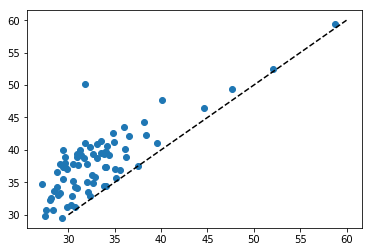

In [12]:
plt.scatter(median_err_nn, median_err_template)
plt.plot([30, 60], [30, 60], 'k--')

In [7]:
error_nn = nib.load('error_nn.nii.gz').get_data()
error_template = nib.load('error_template.nii.gz').get_data()

In [8]:
mask = np.where(~np.isnan(error_nn))

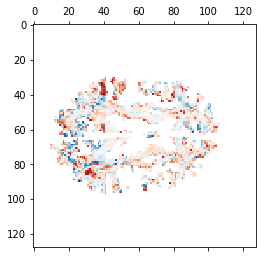

In [9]:
plt.matshow(error_nn[54//2] - error_template[54//2], cmap="RdBu", vmin=-90, vmax=90 )

In [13]:
import scipy.stats as sps

In [15]:
sps.kruskal(error_nn[np.isfinite(error_nn)], error_template[np.isfinite(error_template)])

KruskalResult(statistic=3313.717312850291, pvalue=0.0)

/Users/arokem/.virtualenvs/mri2mri_py2/lib/python2.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/arokem/.virtualenvs/mri2mri_py2/lib/python2.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

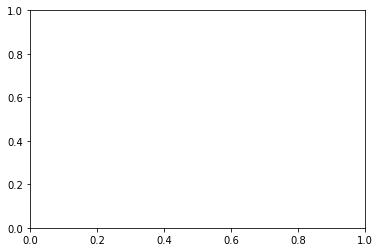

In [10]:
# fig, ax = plt.subplots(1)
# ax.hist(error_nn[mask]-error_template[mask], histtype='step', bins=20)
# ax.vlines(0, ax.get_ylim()[0], ax.get_ylim()[1])
# #ax.hist(error_template[mask], histtype='step')